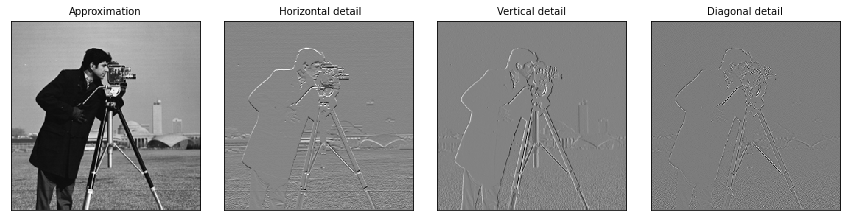

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

(972, 1232)
(973, 1232)


Text(0.5, 1.0, 'keep = 0.05')

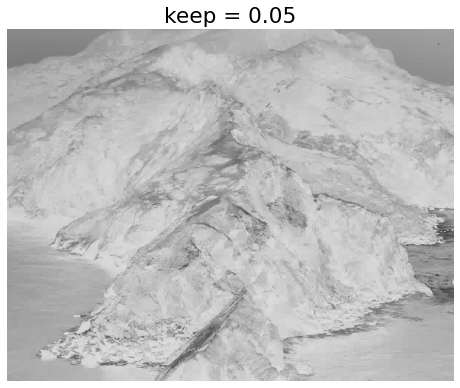

In [54]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt 
import os
import pywt
plt.rcParams['figure.figsize']
plt.rcParams.update({'font.size':18})

A = imread(os.path.join('image.png'))
B = np.mean(A, -1) # convert rgb to grayscale
print(B.shape)
n = 4
w = 'db1'

coeffs = pywt.wavedec2(B,wavelet=w,level=n) # The dwt2() function performs single level 2D Discrete Wavelet Transform.

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
#print(coeffs.shape)
print(coeff_arr.shape)
Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

keep = 0.05

thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
ind = np.abs(coeff_arr) > thresh
Cfilt = coeff_arr * ind

coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')

Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
plt.figure()
plt.imshow(Arecon,cmap='gray_r')
plt.axis('off')
plt.rcParams['figure.figsize'] = [8,8]
plt.title('keep = ' + str(keep))



In [ ]:
A = imread(’../../CH01_SVD/DATA/dog.jpg’);
B = rgb2gray(A); % Convert to grayscale image
subplot(1,3,1), imagesc(B); % Plot image
for j=1:size(B,1); % Compute row-wise FFT
    
    Cshift(j,:) = fftshift(fft(B(j,:)));
C(j,:) = (fft(B(j,:)));
end
subplot(1,3,2), imagesc(log(abs(Cshift)))
for j=1:size(C,2); % Compute column-wise FFT
D(:,j) = fft(C(:,j));
end
subplot(1,3,3), imagesc(fftshift(log(abs(D))))
D = fft2(B); % Much more efficient to use fft2